# Complete Data Analysis Project 

## Fandango Website :
Fandango is the ultimate digital network for all things movies and TV, serving more than 50 million unique visitors per month, according to comScore, with best-in-class movie and TV information, movie ticketing, trailers and original video, and home entertainment. Its portfolio features leading online ticketers Fandango, MovieTickets.com and Flixster; world-renowned entertainment review site Rotten Tomatoes; and Movieclips, the #1 movie trailers and content channel on YouTube. 

Here is one interesting article about this website
[Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/)

![Ratings](https://fivethirtyeight.com/wp-content/uploads/2015/10/fandango_banner_revise.png)


Based on above article, Let's explore the dataset of Fandango website and try to find about the variations in ratings.
And let's determine if Fandango's ratings had a bias towards rating movies better to sell more tickets.

**The dataset is available at https://github.com/fivethirtyeight/data**

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [9]:
#Let's import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv('D:/Data_Science/Data_Analysis/Datasets/fandango_scrape.csv')

In [16]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


#### This dataset has 504 movies with their stars, rating and votes as per Fandango

In [18]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


* It's clearly visible here that the average stars and rating are above 3
* And the median for the same is above 3.5

Let's perform some Exploratory Data Analysis on the dataset

# Exploratory Data Analysis (EDA):

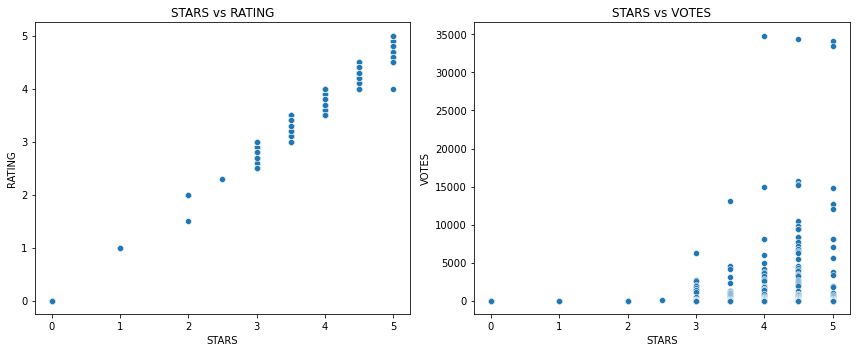

In [65]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(ax =ax[0],data=df,x='STARS',y='RATING')
sns.scatterplot(ax =ax[1],data=df,x='STARS',y='VOTES')

ax[0].set_title('STARS vs RATING')
ax[1].set_title('STARS vs VOTES')
plt.tight_layout();

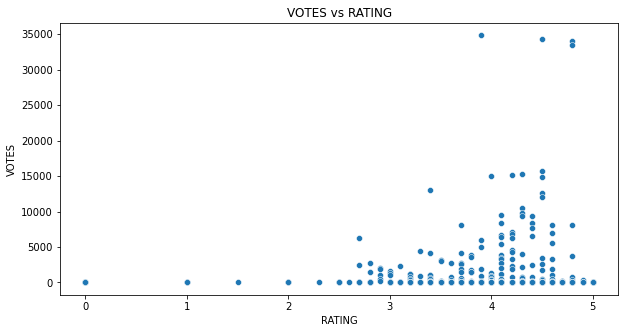

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='RATING',y='VOTES')
plt.title('VOTES vs RATING');

The above two scatterplots are showing a brief picture about the ratings and votes
* In **STARS vs RATING**: This is a strong correlation graph as it shows Stars displayed and actual rating by Fandango.
* In **STARS vs VOTES** : Movies are voted more higher stars side.
* In **VOTES vs RATING** : It is een that less votes count on lower rating and more on higher side

I can plot the above distribution using sns.pairplot(), but I like to plot individually.

Let's plot the distribution and observe the above facts.

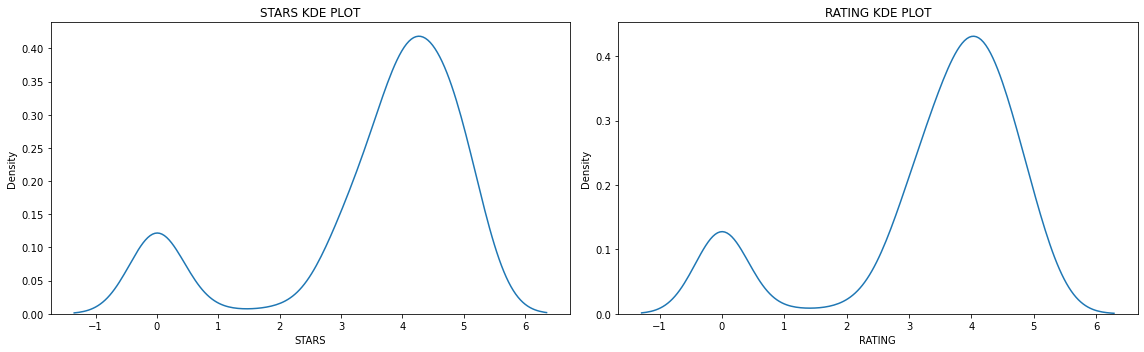

In [57]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
#sns.countplot(ax =ax[0],data=df,x='STARS')
sns.kdeplot(ax =ax[0],data=df,x='STARS')
sns.kdeplot(ax =ax[1],data=df,x='RATING')

ax[0].set_title('STARS KDE PLOT')
ax[1].set_title('RATING KDE PLOT')
plt.tight_layout();

We can observe from the KDE plots that the reviews(STARS/Ratings) are **LEFT SKEWED**.

Let's try to find the correlation in the data

<AxesSubplot:>

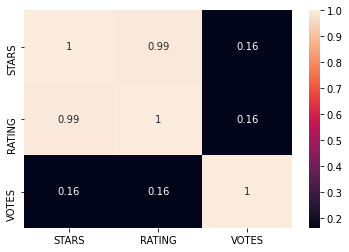

In [70]:
sns.heatmap(df.corr(),annot=True)

Let's check out data further:

In [71]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


Let us explore the films according to the year, We observe that the title includes year details, let's have this value in year column.

In [98]:
df['FILM'][0].split('(')[1][:-1]

'2015'

In [102]:
df['YEAR'] = df['FILM'].apply(lambda x:x.split('(')[-1][:-1])

In [106]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [107]:
df['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Let's visualize this:

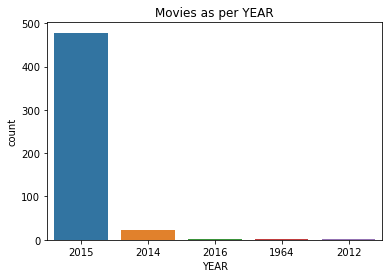

In [110]:
sns.countplot(data=df,x='YEAR')
plt.title('Movies as per YEAR');

We see majority of the observations belong to 2015 as was seen in **value_counts()**

**Let's observe the data for top 10 movies as per VOTES.**

In [112]:
df.sort_values(by=['VOTES'],ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


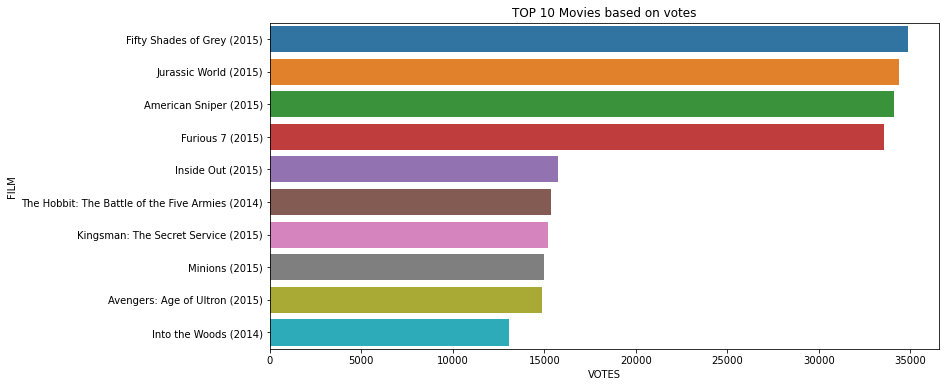

In [139]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.sort_values(by=['VOTES'],ascending=False).head(10),x='VOTES',y='FILM')
plt.title('TOP 10 Movies based on votes');

In [140]:
df.sort_values(by=['VOTES'],ascending=True).head(10)

,FILM,STARS,RATING,VOTES,YEAR
503,Zarafa (2012),0.0,0.0,0,2012
465,Le gaucher (2015),0.0,0.0,0,2015
464,La passion d'Augustine (2015),0.0,0.0,0,2015
463,La leon (2015),0.0,0.0,0,2015
462,La face cache de Margo (2015),0.0,0.0,0,2015
461,Journey to Space 3D (2015),0.0,0.0,0,2015
460,Jilebi (2015),0.0,0.0,0,2015
459,Insanity (2015),0.0,0.0,0,2015
458,How to Change the World (2015),0.0,0.0,0,2015
457,Gun & Goal (2015),0.0,0.0,0,2015


If we look at the above values, we see that there are many movies which has no votes, stars or rating, we can remove this from our data.

In [155]:
df[df['VOTES']==0].shape[0]

69

In [151]:
df.shape

(504, 5)

In [145]:
df_voted = df[df['VOTES']>0]

In [146]:
df_voted.shape

(435, 5)

In [147]:
df_voted.sort_values(by=['VOTES'],ascending=True).head(10)

,FILM,STARS,RATING,VOTES,YEAR
434,Z For Zachariah (2015),5.0,5.0,1,2015
413,Wild Canaries (2015),3.0,3.0,1,2015
412,The Living (2015),3.0,3.0,1,2015
411,The Face of an Angel (2015),3.0,3.0,1,2015
410,"One Cut, One Life (2015)",3.0,3.0,1,2015
409,Nannbenda (2015),3.0,3.0,1,2015
408,Hungry Hearts (2015),3.0,3.0,1,2015
414,Buggs Bunny (2015),4.0,4.0,1,2015
407,Empire of Lust (2015),3.0,3.0,1,2015
405,Amour Fou (2015),3.0,3.0,1,2015


**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user.**

**Let's visualize this difference in distributions.**

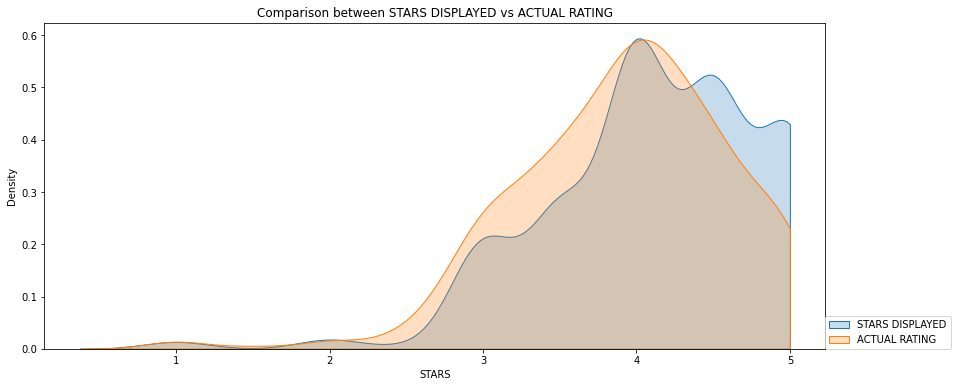

In [174]:
plt.figure(figsize=(14,6))
sns.kdeplot(data=df_voted,x='STARS',fill=True,clip=[0,5],label='STARS DISPLAYED')
sns.kdeplot(data=df_voted,x='RATING',fill=True,clip=[0,5],label='ACTUAL RATING')

plt.legend(loc=(1,0))
plt.title('Comparison between STARS DISPLAYED vs ACTUAL RATING');

Let's create a column and observe the difference of above values.


In [192]:
df_voted['Difference'].loc[:] = df_voted['STARS'] - df_voted['RATING']

In [198]:
df_voted['Difference'].loc[:] = df_voted['Difference'].loc[:].round(2)

In [199]:
df_voted.head()

,FILM,STARS,RATING,VOTES,YEAR,Difference
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


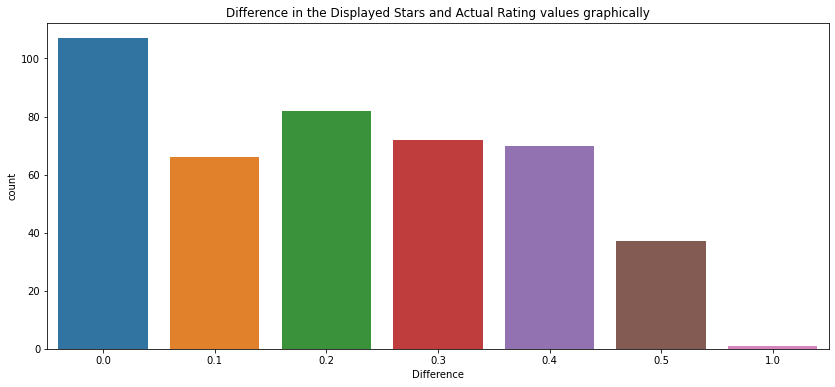

In [204]:
plt.figure(figsize=(14,6))
sns.countplot(data=df_voted,x='Difference')
plt.title('Difference in the Displayed Stars and Actual Rating values graphically');

### Observations:
* We see some movies have a difference of 1 star, this is highly skewed rating
* Majority of movies have some difference greater than 0, since our data had 435 values and around 110 values are showing 0 deviation , others do have a deviation

In [206]:
df_voted[df_voted['Difference'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,Difference
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


This is the movie that has a very skewed rating

# Comparison with other sites

We have been provided with another dataset which has reviews and ratings from other sites, let's import the data and perform EDA on that.

In [207]:
df_sites = pd.read_csv('D:/Data_Science/Data_Analysis/Datasets/all_sites_scores.csv')

In [208]:
df_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [209]:
df_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [210]:
df_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Observations from the dataset:
* Fewer data points, 146 rows as compared to our Fandango dataset
* It contains reviews from RottenTomatoes, Metacritic, IMDB
* For RottenTomatoes and Metacritic, we have critic ratings and user ratings
* RottenTomatoes has rating scale of 0-100
* Metacritic has rating scale of 0-100 for critics and 0-10 for users
* IMDB follows rating scale of 0-10
* Metacritic and IMBD also has user votes count

## ROTTENTOMATOES:

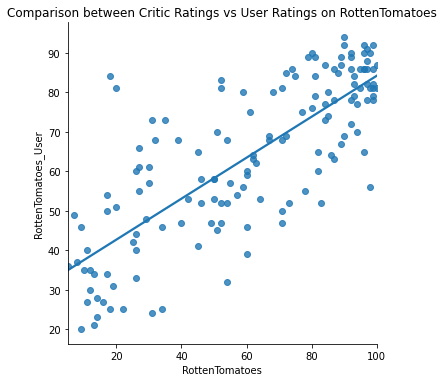

In [223]:
sns.lmplot(data=df_sites,x='RottenTomatoes',y='RottenTomatoes_User',ci=None)
plt.title('Comparison between Critic Ratings vs User Ratings on RottenTomatoes');

We have seen above two ways to visualise the correlation between Critic Ratings vs User Ratings on RottenTomatoes
* We can see that there is a positive correlation overall as we can expect but there are outlier values.

In [225]:
df_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [237]:
df_sites['RT_Diff'] = df_sites['RottenTomatoes'] - df_sites['RottenTomatoes_User']

In [238]:
df_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


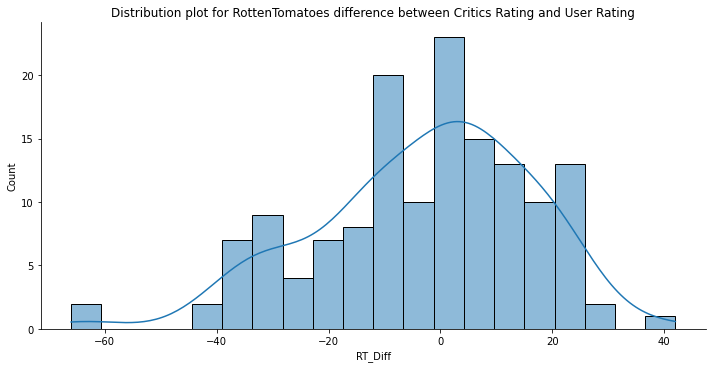

In [263]:
sns.displot(data=df_sites,x='RT_Diff',bins=20,kde=True,height=5,aspect=2)
plt.title('Distribution plot for RottenTomatoes difference between Critics Rating and User Rating');

This graph is almost a normal distribution.

Let us try to observe the movies which are at both the tail ends and analyze further

In [257]:
df_sites.nlargest(5,['RT_Diff'])[['FILM','RT_Diff']]

,FILM,RT_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


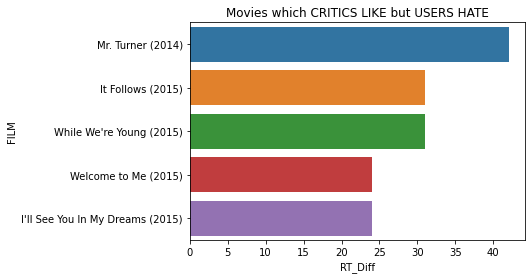

In [261]:
sns.barplot(data=df_sites.nlargest(5,['RT_Diff']),x='RT_Diff',y="FILM")
plt.title('Movies which CRITICS LIKE but USERS HATE');

In [264]:
df_sites.nsmallest(5,['RT_Diff'])[['FILM','RT_Diff']]

,FILM,RT_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


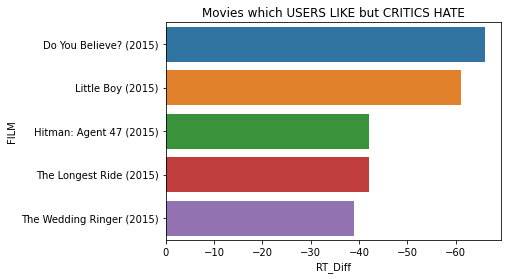

In [269]:
sns.barplot(data=df_sites.nsmallest(5,['RT_Diff']),x='RT_Diff',y="FILM")
plt.title('Movies which USERS LIKE but CRITICS HATE')
plt.gca().invert_xaxis();

## METACRITIC


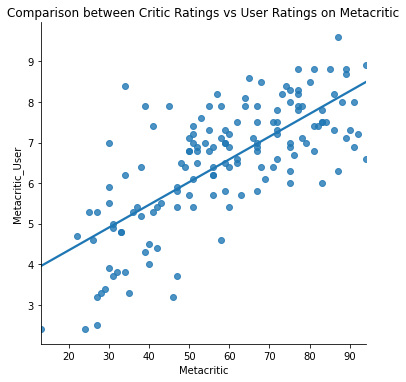

In [224]:
sns.lmplot(data=df_sites,x='Metacritic',y='Metacritic_User',ci=None)
plt.title('Comparison between Critic Ratings vs User Ratings on Metacritic');

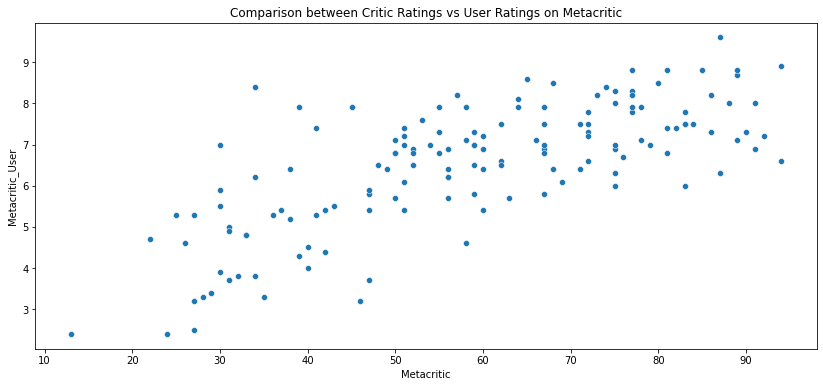

In [306]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_sites,x='Metacritic',y='Metacritic_User')
plt.title('Comparison between Critic Ratings vs User Ratings on Metacritic');

In [307]:
df_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


We can see that we cannot have one to one comparisons between Metacritic critics rating and Metacritic user rating due to different range of data.

We will address this later on, let's visualize IMDB for now.


## IMDB

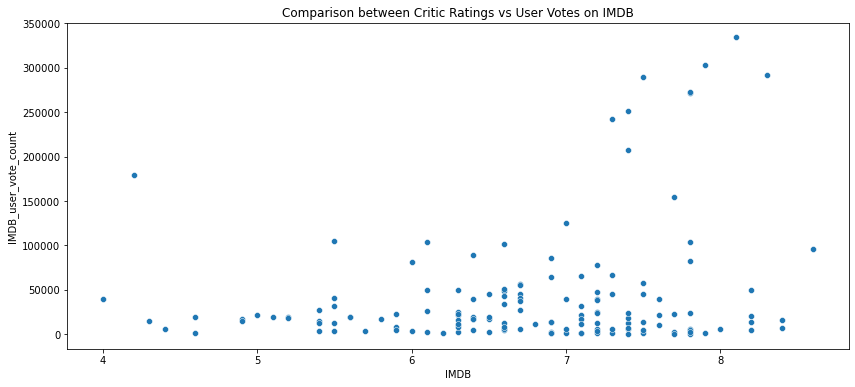

In [300]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_sites,x='IMDB',y='IMDB_user_vote_count')
plt.title('Comparison between Critic Ratings vs User Votes on IMDB');

* Here again we can see that there are some movies which have very few user votes but they have high IMDB Rating
* Also there are few movies where user votes are high but IMDB rating is low

We have user vote count data for Metacritic as well, let us compare them both:

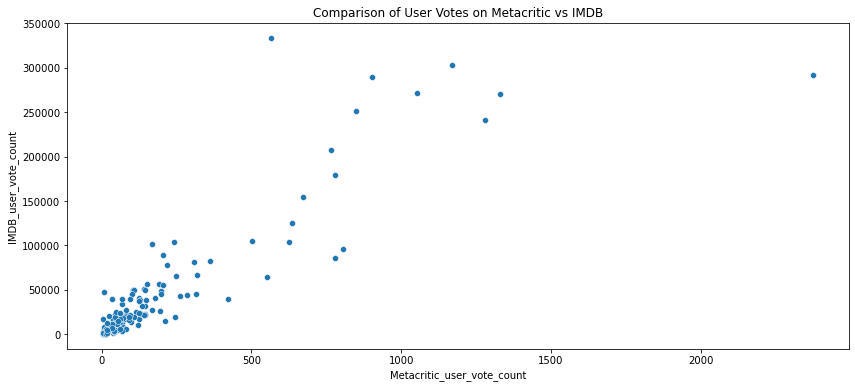

In [302]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')
plt.title('Comparison of User Votes on Metacritic vs IMDB');

Here we can observe two clear major outliers, let's explore about them

In [304]:
df_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [305]:
df_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


There we have it:
* **The Imitation Game (2014)** has the highest IMDB user votes but low Metacritic user votes.
* **Mad Max: Fury Road (2015)** has the highest Metacritic user votes but low IMDB user votes.

## Comparison of Fandango with other Sites

This is the main part of the project, which will help us understand what is going on in the dataset of Fandango.

For this we need to prepare data, and merge both datasets together, let's perform this.

We can perform inner join on **FILM** column.

In [308]:
df_all = pd.merge(df,df_sites,on='FILM',how='inner')

In [310]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  RT_Diff                     145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [312]:
df_all.describe(include='all')

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Diff
count,145,145.000000,145.000000,145.000000,145,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
unique,145,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Testament of Youth (2015),NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.086207,3.841379,3817.696552,NaN,60.634483,63.696552,58.696552,6.508966,6.729655,184.489655,42572.186207,-3.062069
std,NaN,0.541169,0.502437,6368.668671,NaN,30.161098,19.974749,19.538183,1.510883,0.957944,317.361740,67558.506121,19.218488
min,NaN,3.000000,2.700000,35.000000,NaN,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000,-66.000000
25%,NaN,3.500000,3.500000,218.000000,NaN,31.000000,50.000000,43.000000,5.700000,6.300000,33.000000,5626.000000,-14.000000
50%,NaN,4.000000,3.900000,1430.000000,NaN,63.000000,66.000000,59.000000,6.800000,6.900000,72.000000,18986.000000,0.000000
75%,NaN,4.500000,4.200000,4279.000000,NaN,89.000000,81.000000,75.000000,7.500000,7.400000,167.000000,44711.000000,11.000000


Here we can see, we cannot compare the ratings and stars from Fandango with any other sites due to different rating scale.

We need to normalize the ratings so we can compare one to one.

In [344]:
df_0_100_rating = df_all[['RottenTomatoes','RottenTomatoes_User','Metacritic']]
df_0_100_rating.head()

,RottenTomatoes,RottenTomatoes_User,Metacritic
0,25,42,46
1,71,81,59
2,72,85,72
3,81,84,67
4,98,90,94


In [345]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
Norm_data= scaler.fit_transform(df_exp1)
pd.DataFrame(Norm_data,columns=df_exp1.columns).head()

,RottenTomatoes,RottenTomatoes_User,Metacritic
0,1.052632,1.486486,2.037037
1,3.473684,4.121622,2.839506
2,3.526316,4.391892,3.641975
3,4.000000,4.324324,3.333333
4,4.894737,4.729730,5.000000


**We used the MinMaxScaler here but there is some issue, in the Metacritic column at index loc 4, we see a rating of 5, but its original rating was 94/100, so minmaxscaler is not useful here, let's create a custom function for our case.**

In [365]:
def normalize(df,max_value,min_value):
    result = df.copy()
    for column in df:
        result[column] = (df[column] - min_value) / (max_value - min_value))
    return result*5

In [366]:
df_norm_data = pd.DataFrame(normalize(df_0_100_rating,100,0))

In [368]:
df_0_10_rating = df_all[['Metacritic_User','IMDB']]

In [370]:
df_norm_data[['Metacritic_User','IMDB']] = pd.DataFrame(normalize(df_0_10_rating,10,0))

In [372]:
df_norm_data.head()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,1.25,2.10,2.30,1.60,2.10
1,3.55,4.05,2.95,3.50,3.65
2,3.60,4.25,3.60,3.30,3.70
3,4.05,4.20,3.35,3.40,3.70
4,4.90,4.50,4.70,4.45,4.30


In [397]:
df_norm_data[['Fandango_STARS','Fandango_RATING']] = df_all[['STARS','RATING']]

In [461]:
df_norm_data.head()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_STARS,Fandango_RATING
0,1.25,2.10,2.30,1.60,2.10,4.0,3.9
1,3.55,4.05,2.95,3.50,3.65,4.5,4.5
2,3.60,4.25,3.60,3.30,3.70,5.0,4.8
3,4.05,4.20,3.35,3.40,3.70,5.0,4.8
4,4.90,4.50,4.70,4.45,4.30,4.5,4.5


Finally, we have the data we needed for further analysis:
* All the Ratings are in the scale of 0-5 

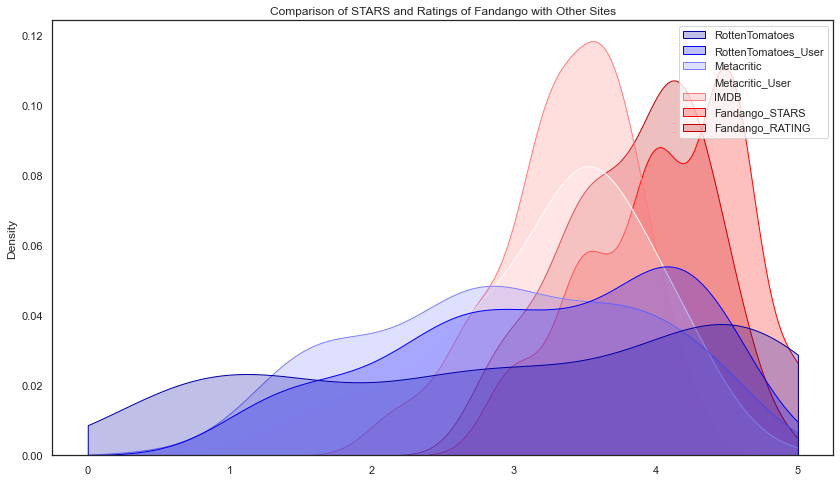

In [475]:
plt.figure(figsize=(14,8))
fig = sns.kdeplot(data=df_norm_data,clip=[0,5],fill=True,palette='seismic' )
plt.title('Comparison of STARS and Ratings of Fandango with Other Sites');

No handles with labels found to put in legend.


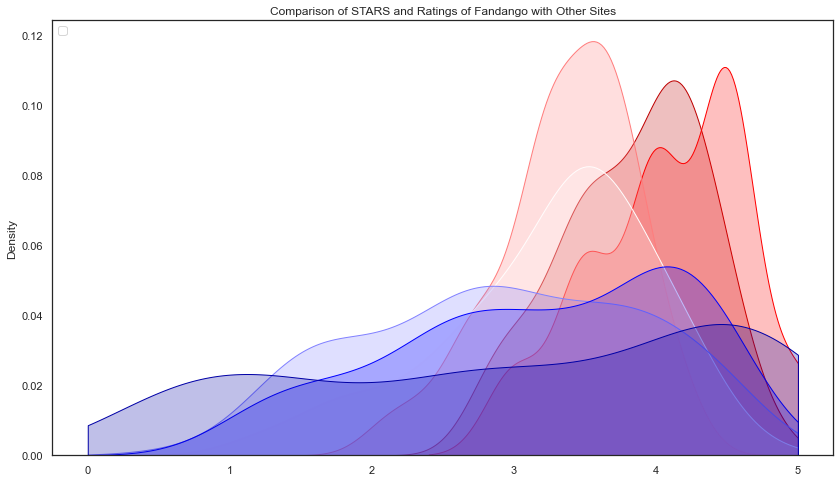

In [476]:
plt.figure(figsize=(14,8))
fig = sns.kdeplot(data=df_norm_data,clip=[0,5],fill=True,palette='seismic' )
plt.title('Comparison of STARS and Ratings of Fandango with Other Sites')
plt.legend(loc='upper left');

This is some issue with this kdeplot, and we are unable to move this legend. There is [this github post ](https://github.com/mwaskom/seaborn/issues/2280) which says the same and we can get a function to move the axes from this post.

In [425]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

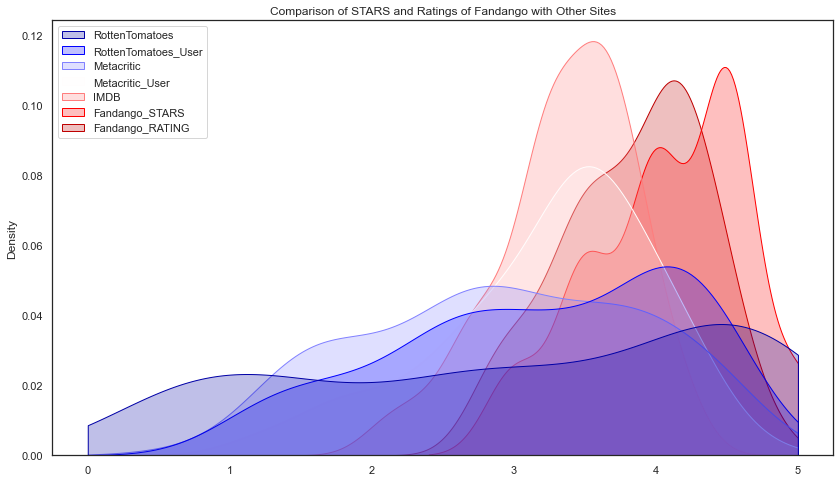

In [478]:
fig,ax = plt.subplots(figsize=(14,8))
sns.kdeplot(data=df_norm_data,clip=[0,5],fill=True,palette='seismic' )
plt.title('Comparison of STARS and Ratings of Fandango with Other Sites')
move_legend(ax,'upper left');

## Observations:
* We can see some clear difference in the ratings of the sites
* Fandango's Ratings and Stars are far higher than the average rating from other sites
* We can see a clear shift to the right in the peaks of the KDE plots for Fandango.

Let us compare stars given by fandango against the critic ratings from RottenTomatoes and Metacritic

In [479]:
df_norm_data.columns

Index(['RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_STARS', 'Fandango_RATING'],
      dtype='object')

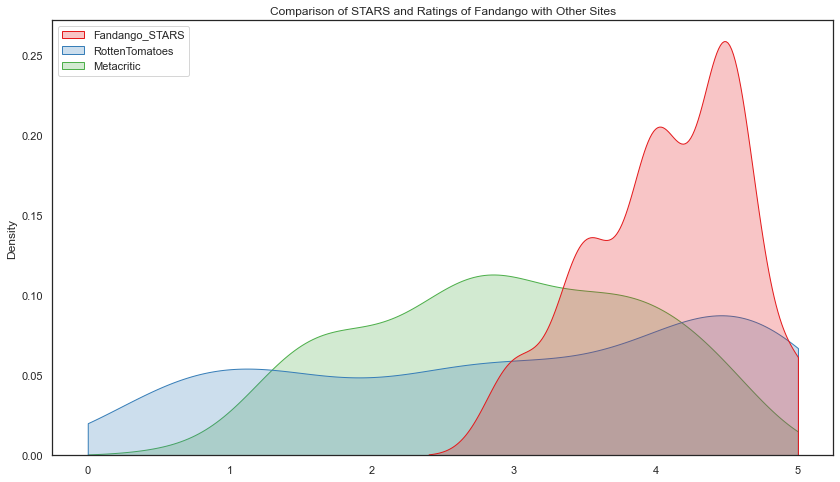

In [481]:
fig,ax = plt.subplots(figsize=(14,8))
sns.kdeplot(data=df_norm_data[['Fandango_STARS','RottenTomatoes','Metacritic']],clip=[0,5],fill=True,palette='Set1' )
plt.title('Comparison of STARS and Ratings of Fandango with Other Sites')
move_legend(ax,'upper left');

* Fandango has clearly given higher stars for movies as compared to Metacritic and RottenTomatoes

Let us further prove this using a histogram and a clustermap.

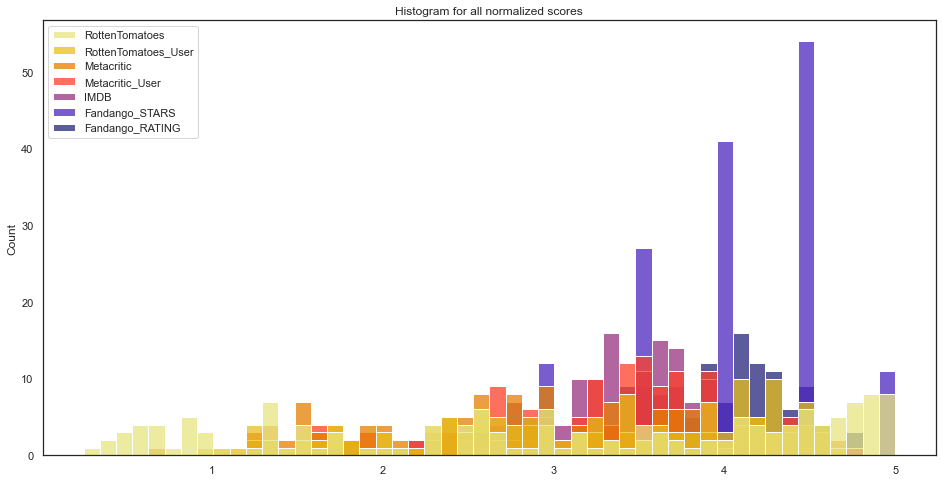

In [496]:
plt.figure(figsize=(16,8))
sns.histplot(data=df_norm_data,bins=50,palette='CMRmap_r')
plt.title('Histogram for all normalized scores');

We can again clearly see that Fandango has given more higher ratings for all movies.

Ler's plot clustermap.

<Figure size 1152x576 with 0 Axes>

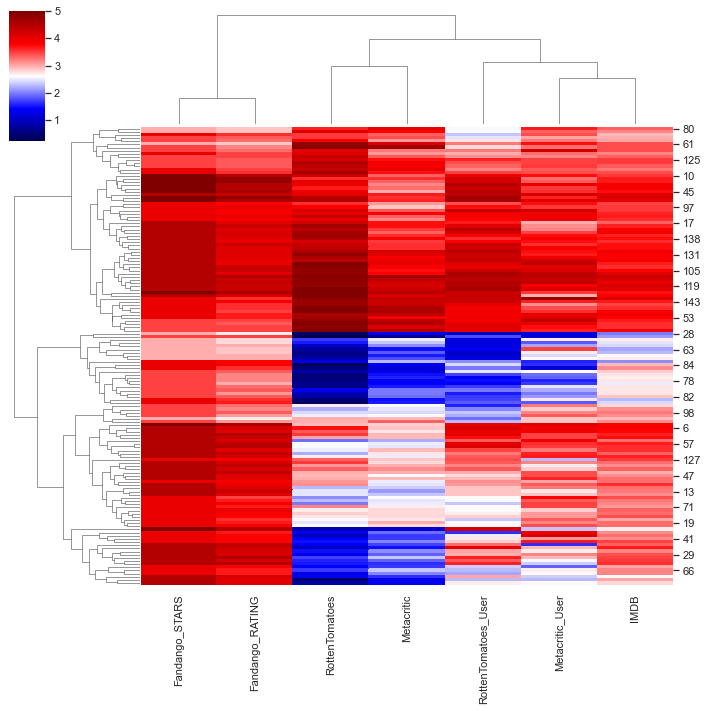

In [503]:
plt.figure(figsize=(16,8))
sns.clustermap(data=df_norm_data,cmap='seismic');

We can see clearly from this clustermap that Fandango has given higher Stars and Ratings even for worst movies as per other sites.

Let's check out such worst rated movies and their scores as per all sites.

Let's compare the top 10 data considering the worst rated as per RottenTomatoes since they appear to rate movies well.

In [506]:
df_norm_data.sort_values(by=['RottenTomatoes']).head(10)

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_STARS,Fandango_RATING
49,0.25,1.80,0.65,1.20,2.15,3.5,3.5
84,0.35,2.45,1.40,1.65,2.95,4.0,3.9
54,0.40,1.85,1.55,1.85,2.45,4.0,3.7
25,0.45,2.30,1.30,2.30,3.05,4.5,4.1
28,0.45,1.00,1.35,1.25,2.00,3.0,2.7
50,0.50,1.75,1.50,2.75,2.30,4.0,3.6
88,0.55,2.00,1.20,1.20,3.15,4.0,3.6
87,0.55,1.35,1.60,1.90,2.70,3.5,3.2
78,0.60,1.50,1.35,1.60,2.75,3.5,3.2
77,0.60,1.75,1.50,1.95,2.75,3.5,3.2


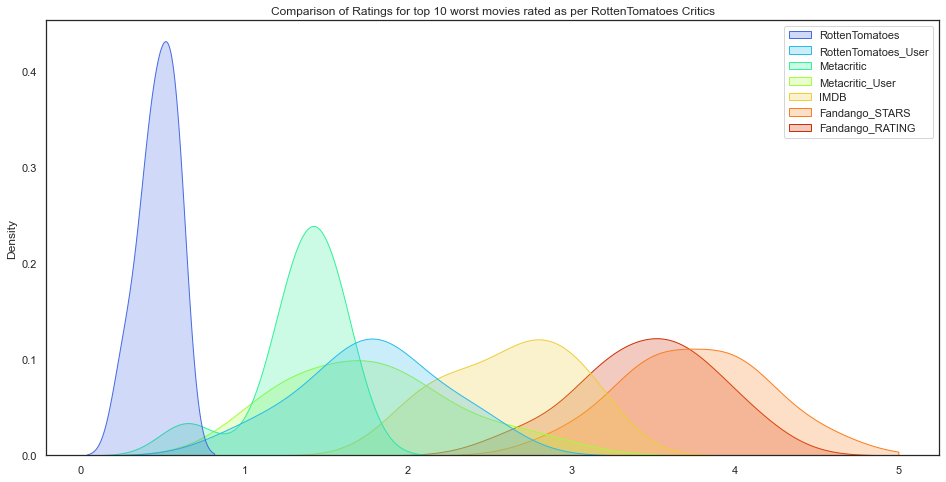

In [526]:
fig,ax = plt.subplots(figsize=(16,8))
sns.kdeplot(data=df_norm_data.sort_values(by=['RottenTomatoes']).head(10),clip=[0,5],fill=True,palette='turbo')
plt.title('Comparison of Ratings for top 10 worst movies rated as per RottenTomatoes Critics');

# CONCLUSION:

### We went throught this dataset from [FiveThirtyEight](https://fivethirtyeight.com/) and tried to find the insights in the data and explore the ratings given by Fandango as compared to other movie review sites.

### Actions performed:

* Firstly I imported the data for Fandango and performed EDA to find some observations and noted the same using plots.
* Later, I imported the data for other sites : RottenTomatoes, Metacritic and IMDB and performed EDA on the same.
* To create a complete dataset, I merged both the Datasets with normalization of scores to bring all values on 0-5 scale.
* Then I performed data analysis on the complete dataset and captured my findings.

### Observations:
* It was visible that the STARS displayed on the Fandango site were skewed than the Actual RATING.
* Kernel Density Estimation plots showed that the RATING and STARS on Fandango website were skewed to give higher values as compared to other movie reviews websites.
* It was possible to confirm the same using KDEplots, Histogram and Clustermap.
* Finally for the worst 10 movies as per RottenTomatoes, Kdeplot showed how flawed were ratings given by Fandango.

### Clearly, Fandango has given incorrect ratings on their website to make more people buy the tickets from their website and watch the movie.

### So confirm the movie ratings on multiple sites before buying any tickets :P


